# Dataset Description

This dataset contains Airbnb listing information in New York City for the year 2019. It contains 48,895 rows and 16 columns.

# Descriptive Statistics and Visualisations

This section contains analysis of descriptive statistics and visualisations.

In [1]:
#importing required packages for analysis
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import urllib as url 
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline 
from pylab import rcParams
import matplotlib.animation as animation
from matplotlib import rc
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
#setting visualisation size
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [3]:
#importing dataset
airbnb_data = pd.read_csv(r'C:\Users\m\Desktop\Masters Modules\MS5114 Advanced Programming for Business Analytics\Group Project\Dataset\AB_NYC_2019.csv')

airbnb_data.head(5) #checking first 10 rows of dataset

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
print("Number of rows:",len(airbnb_data)) #checking number of rows in dataset
print("Number of columns:",len(airbnb_data.columns)) #checking number of columns in dataset
print("")
print(airbnb_data.dtypes) #checking data types of columns
print("")
print(airbnb_data.columns) #checking column names

Number of rows: 48895
Number of columns: 16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
      

In [5]:
Neighbourhood_Groups = airbnb_data.neighbourhood_group.unique() #getting names of neighbourhood groups
print("Number of Hosts:", len(airbnb_data["host_id"].unique()))#getting the number of hosts
print("") #leaving a space to make it easier to read output
print ("Neighbourhood Groups:", Neighbourhood_Groups) #printing the names of neighbourhood groups


Number of Hosts: 37457

Neighbourhood Groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [6]:
Mean_Price = airbnb_data["price"].mean() #getting mean price
print("Mean Price: $",(round(Mean_Price,2))) #rounding mean price to 2 decimal places
Median_Price = airbnb_data["price"].median() #checking median price
print("Median Price: $", Median_Price)

Mean Price: $ 152.72
Median Price: $ 106.0


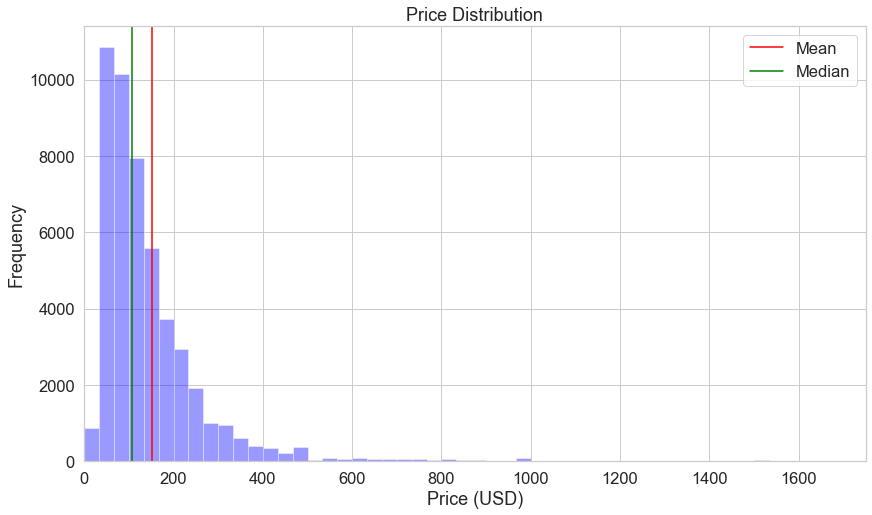

In [7]:
#Creating a histogram that displays the distribution of price using seaborn
#It also displays the mean and median price

Price_Histogram = sns.distplot(airbnb_data["price"], kde=False, bins=300, color = "blue")
Price_Histogram.set_xlim(0,1750) #setting the scale of x axis
plt.title("Price Distribution") #adding title
plt.xlabel("Price (USD)") #adding x label
plt.ylabel("Frequency") #adding y label
plt.axvline(Mean_Price,color = "red", linestyle = "-") #adding line for mean price
plt.axvline(Median_Price,color = "green", linestyle = "-") #adding line for median price
plt.legend({"Mean": Mean_Price, "Median": Median_Price}) #adding legend 
plt.show(Price_Histogram) #showing histogram

In [8]:
Mean_Min_Nights = airbnb_data["minimum_nights"].mean() #checking mean min nights
print("Mean Minimum Nights:", (round(Mean_Min_Nights,2))) #rounding mean min nights to 2 decimal places

Median_Min_Nights = airbnb_data["minimum_nights"].median() #checking median min nights
print("Median Minimum Nights", Median_Min_Nights)

Mean Minimum Nights: 7.03
Median Minimum Nights 3.0


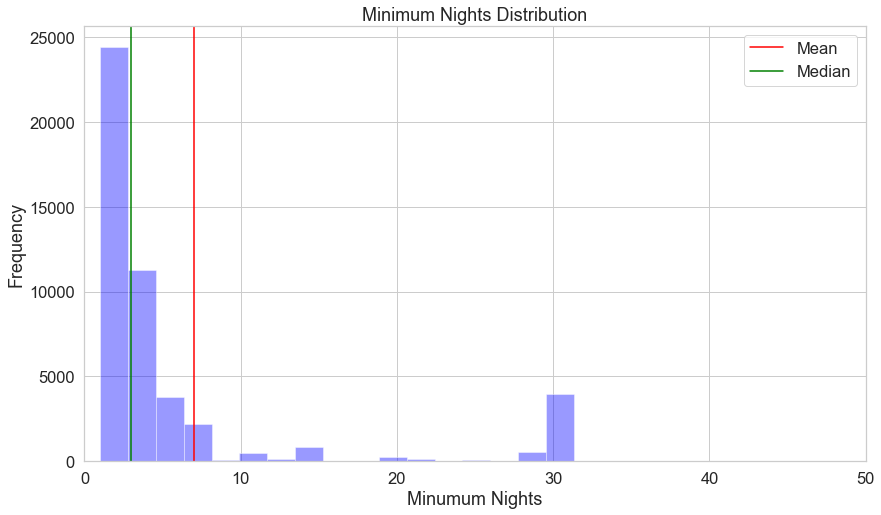

In [9]:
#creating minimum nights histogram
Min_Nights_Histogram = sns.distplot(airbnb_data["minimum_nights"], kde=False, bins=700, color = "blue")
Min_Nights_Histogram.set_xlim(0,50) #setting the scale of x axis
plt.title("Minimum Nights Distribution")
plt.xlabel("Minumum Nights")
plt.ylabel("Frequency")
plt.axvline(Mean_Min_Nights,color = "red") 
plt.axvline(Median_Min_Nights,color = "green") 
plt.legend({"Mean": Mean_Min_Nights, "Median": Median_Min_Nights}) 
plt.show(Min_Nights_Histogram) 

In [10]:
Neighbourhood_Groups = airbnb_data.groupby("neighbourhood_group") #grouping neighbourhoods in order to do descriptive stats

#neighbourhood group descritpive stats based on specified columns
Neighbourhood_Groups["price","number_of_reviews","minimum_nights","calculated_host_listings_count"].describe().head()

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                                    number_of_reviews             ...  \
                       75%      max             count       mean  ...   
neighbourhood_group                                               ...   
Bronx                 99.0   2500.0            1091.0  26.004583  ...   
Brooklyn             150.0  10000.0           20104.0  24.202845  ...   
Manhattan            220.0  10000.0           21661.0  20.985596  ...   
Queens               110.0  10000.0            5666.0  27.700318  ...   
Staten Island        110.0   5000.0             373.0  30.941019  ...   

                    minimum_nights         calculated_host_listings_count  \
                               75%     max                          count   
neighbourhood_group                                                         
Bronx                          3.0   365.0                         1091.0   
Brooklyn                       5.0   999.0                        20104.0   
Manhattan                      6.0  1250.0                        21661.0   
Queens                         3.0   500.0                         5666.0   
Staten Island                  3.0   365.0                          373.0   

                                                                      
                          mean        std  min  25%  50%  75%    max  
neighbourhood_group                                                   
Bronx                 2.233731   2.370576  1.0  1.0  1.0  2.0   37.0  
Brooklyn              2.284371   5.273758  1.0  1.0  1.0  2.0  232.0  
Manhattan            12.791330  48.234766  1.0  1.0  1.0  2.0  327.0  
Queens                4.060184  12.445003  1.0  1.0  1.0  3.0  103.0  
Staten Island         2.319035   1.915580  1.0  1.0  1.0  3.0    8.0  

[5 rows x 32 columns]

In [11]:
Room_Types = airbnb_data.groupby("room_type") #grouping room types in order to do descriptive stats

#room type descriptive stats based on specified columns
Room_Types["price","number_of_reviews","minimum_nights","calculated_host_listings_count"].describe().head()

price                                                    \
                   count        mean         std  min    25%    50%    75%   
room_type                                                                    
Entire home/apt  25409.0  211.794246  284.041611  0.0  120.0  160.0  229.0   
Private room     22326.0   89.780973  160.205262  0.0   50.0   70.0   95.0   
Shared room       1160.0   70.127586  101.725252  0.0   33.0   45.0   75.0   

                         number_of_reviews             ... minimum_nights  \
                     max             count       mean  ...            75%   
room_type                                              ...                  
Entire home/apt  10000.0           25409.0  22.842418  ...            5.0   
Private room     10000.0           22326.0  24.112962  ...            4.0   
Shared room       1800.0            1160.0  16.600000  ...            3.0   

                        calculated_host_listings_count                        \
                    max                          count       mean        std   
room_type                                                                      
Entire home/apt  1250.0                        25409.0  10.698335  44.381193   
Private room      999.0                        22326.0   3.227717  10.218641   
Shared room       999.0                         1160.0   4.662931   6.218151   

                                            
                 min  25%  50%  75%    max  
room_type                                   
Entire home/apt  1.0  1.0  1.0  2.0  327.0  
Private room     1.0  1.0  1.0  2.0  327.0  
Shared room      1.0  1.0  2.0  6.0   34.0  

[3 rows x 32 columns]

In [12]:
#checking top 15 hosts with the most listings 
Top_15_Hosts = airbnb_data.host_id.value_counts().head(15) #counting individual host_id and selecting top 15 rows
print("Top 15 Hosts:")
print(Top_15_Hosts)

Top 15 Hosts:
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64


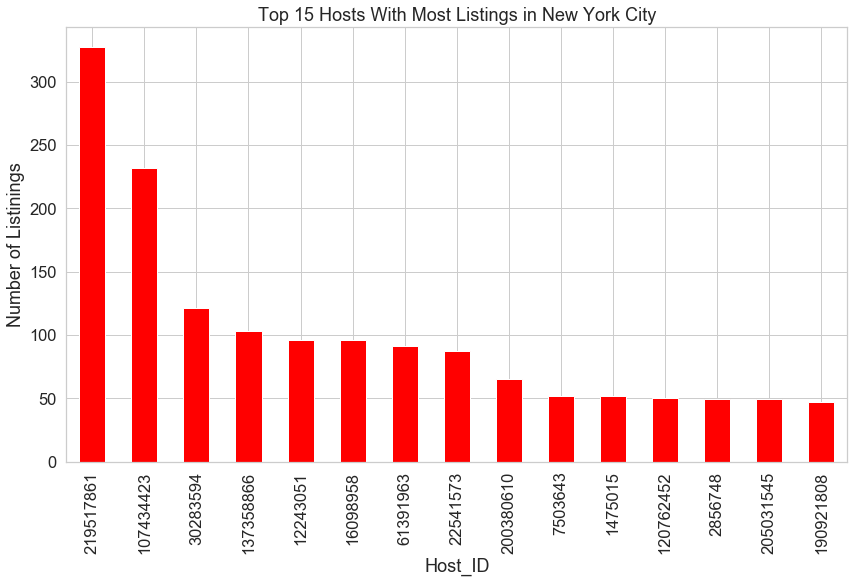

In [13]:
#Barplot with top 15 hosts with mosts listings in New York City
Top_15_Hosts_Plot = Top_15_Hosts.plot(kind="bar", color = "red" )
Top_15_Hosts_Plot.set_title("Top 15 Hosts With Most Listings in New York City")
Top_15_Hosts_Plot.set_xlabel("Host_ID")
Top_15_Hosts_Plot.set_ylabel("Number of Listinings")
plt.show(Top_15_Hosts_Plot)

In [14]:
#getting the top 20 neighbourhoods in terms of the number of listings 
Top_20_Neighbourhoods = airbnb_data.neighbourhood.value_counts().head(20) #counting each neighbourhood and selecting top 20 rows
print("Top 20 Neighbourhoods:")
print(Top_20_Neighbourhoods)

Top 20 Neighbourhoods:
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: neighbourhood, dtype: int64


Text(0, 0.5, 'Number of Listings')

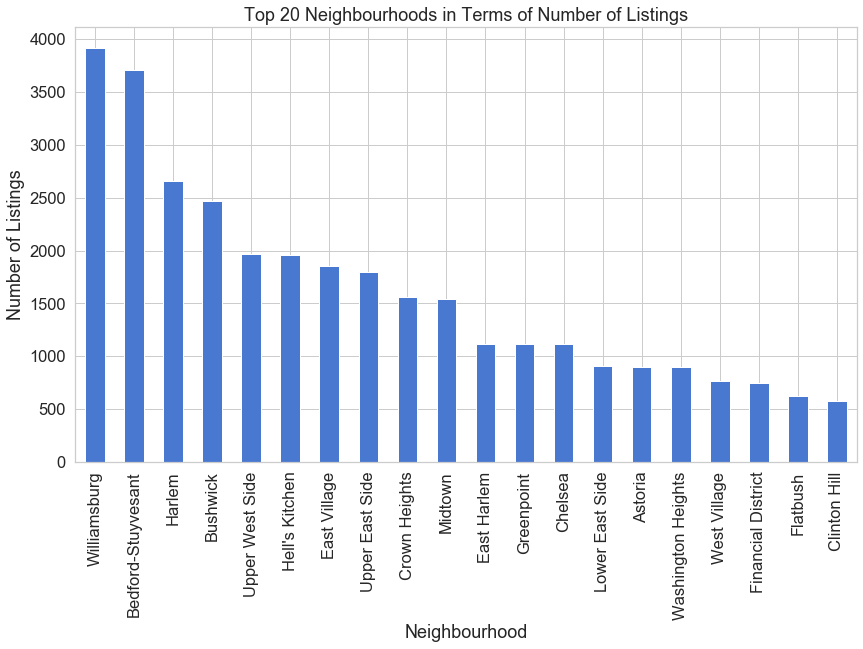

In [15]:
#barplot of top 20 neighbourhoods in terms of the number of listings 
T20_Neighbourhoods_Count = Top_20_Neighbourhoods.plot(kind="bar")
T20_Neighbourhoods_Count.set_title("Top 20 Neighbourhoods in Terms of Number of Listings")
T20_Neighbourhoods_Count.set_xlabel("Neighbourhood")
T20_Neighbourhoods_Count.set_ylabel("Number of Listings")

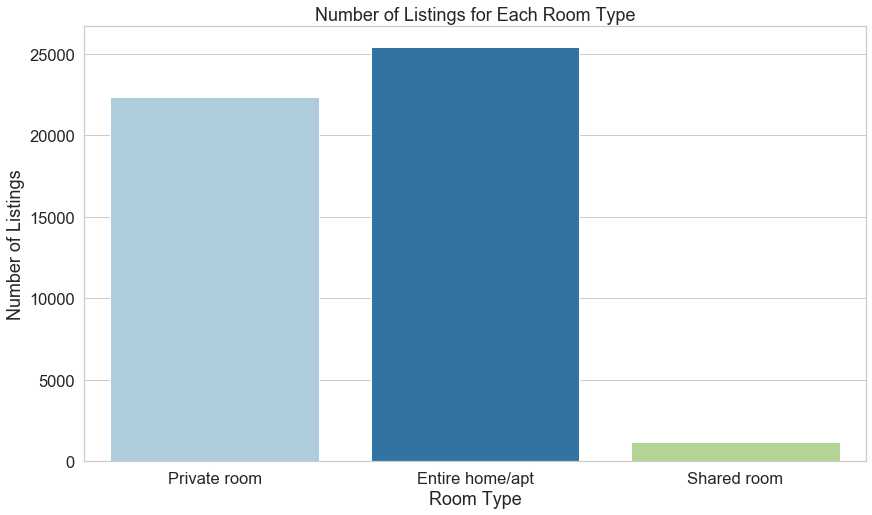

In [16]:
#creating a plot for the number of listings for each room type
Room_Type_Count = sns.countplot(airbnb_data["room_type"], palette= "Paired")
Room_Type_Count.set_title("Number of Listings for Each Room Type")
Room_Type_Count.set_xlabel("Room Type")
Room_Type_Count.set_ylabel("Number of Listings")
plt.show(Room_Type_Count)

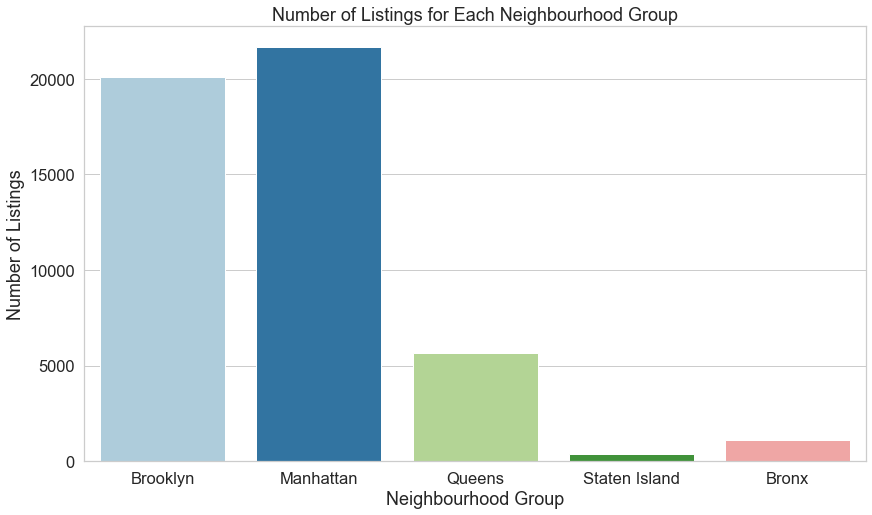

In [17]:
#creating a plot for the number of listings for each neighbourhood group
Neighbourhood_Group_Count = sns.countplot(airbnb_data["neighbourhood_group"], palette= "Paired")
Neighbourhood_Group_Count.set_title("Number of Listings for Each Neighbourhood Group")
Neighbourhood_Group_Count.set_xlabel("Neighbourhood Group")
Neighbourhood_Group_Count.set_ylabel("Number of Listings")
plt.show(Neighbourhood_Group_Count)

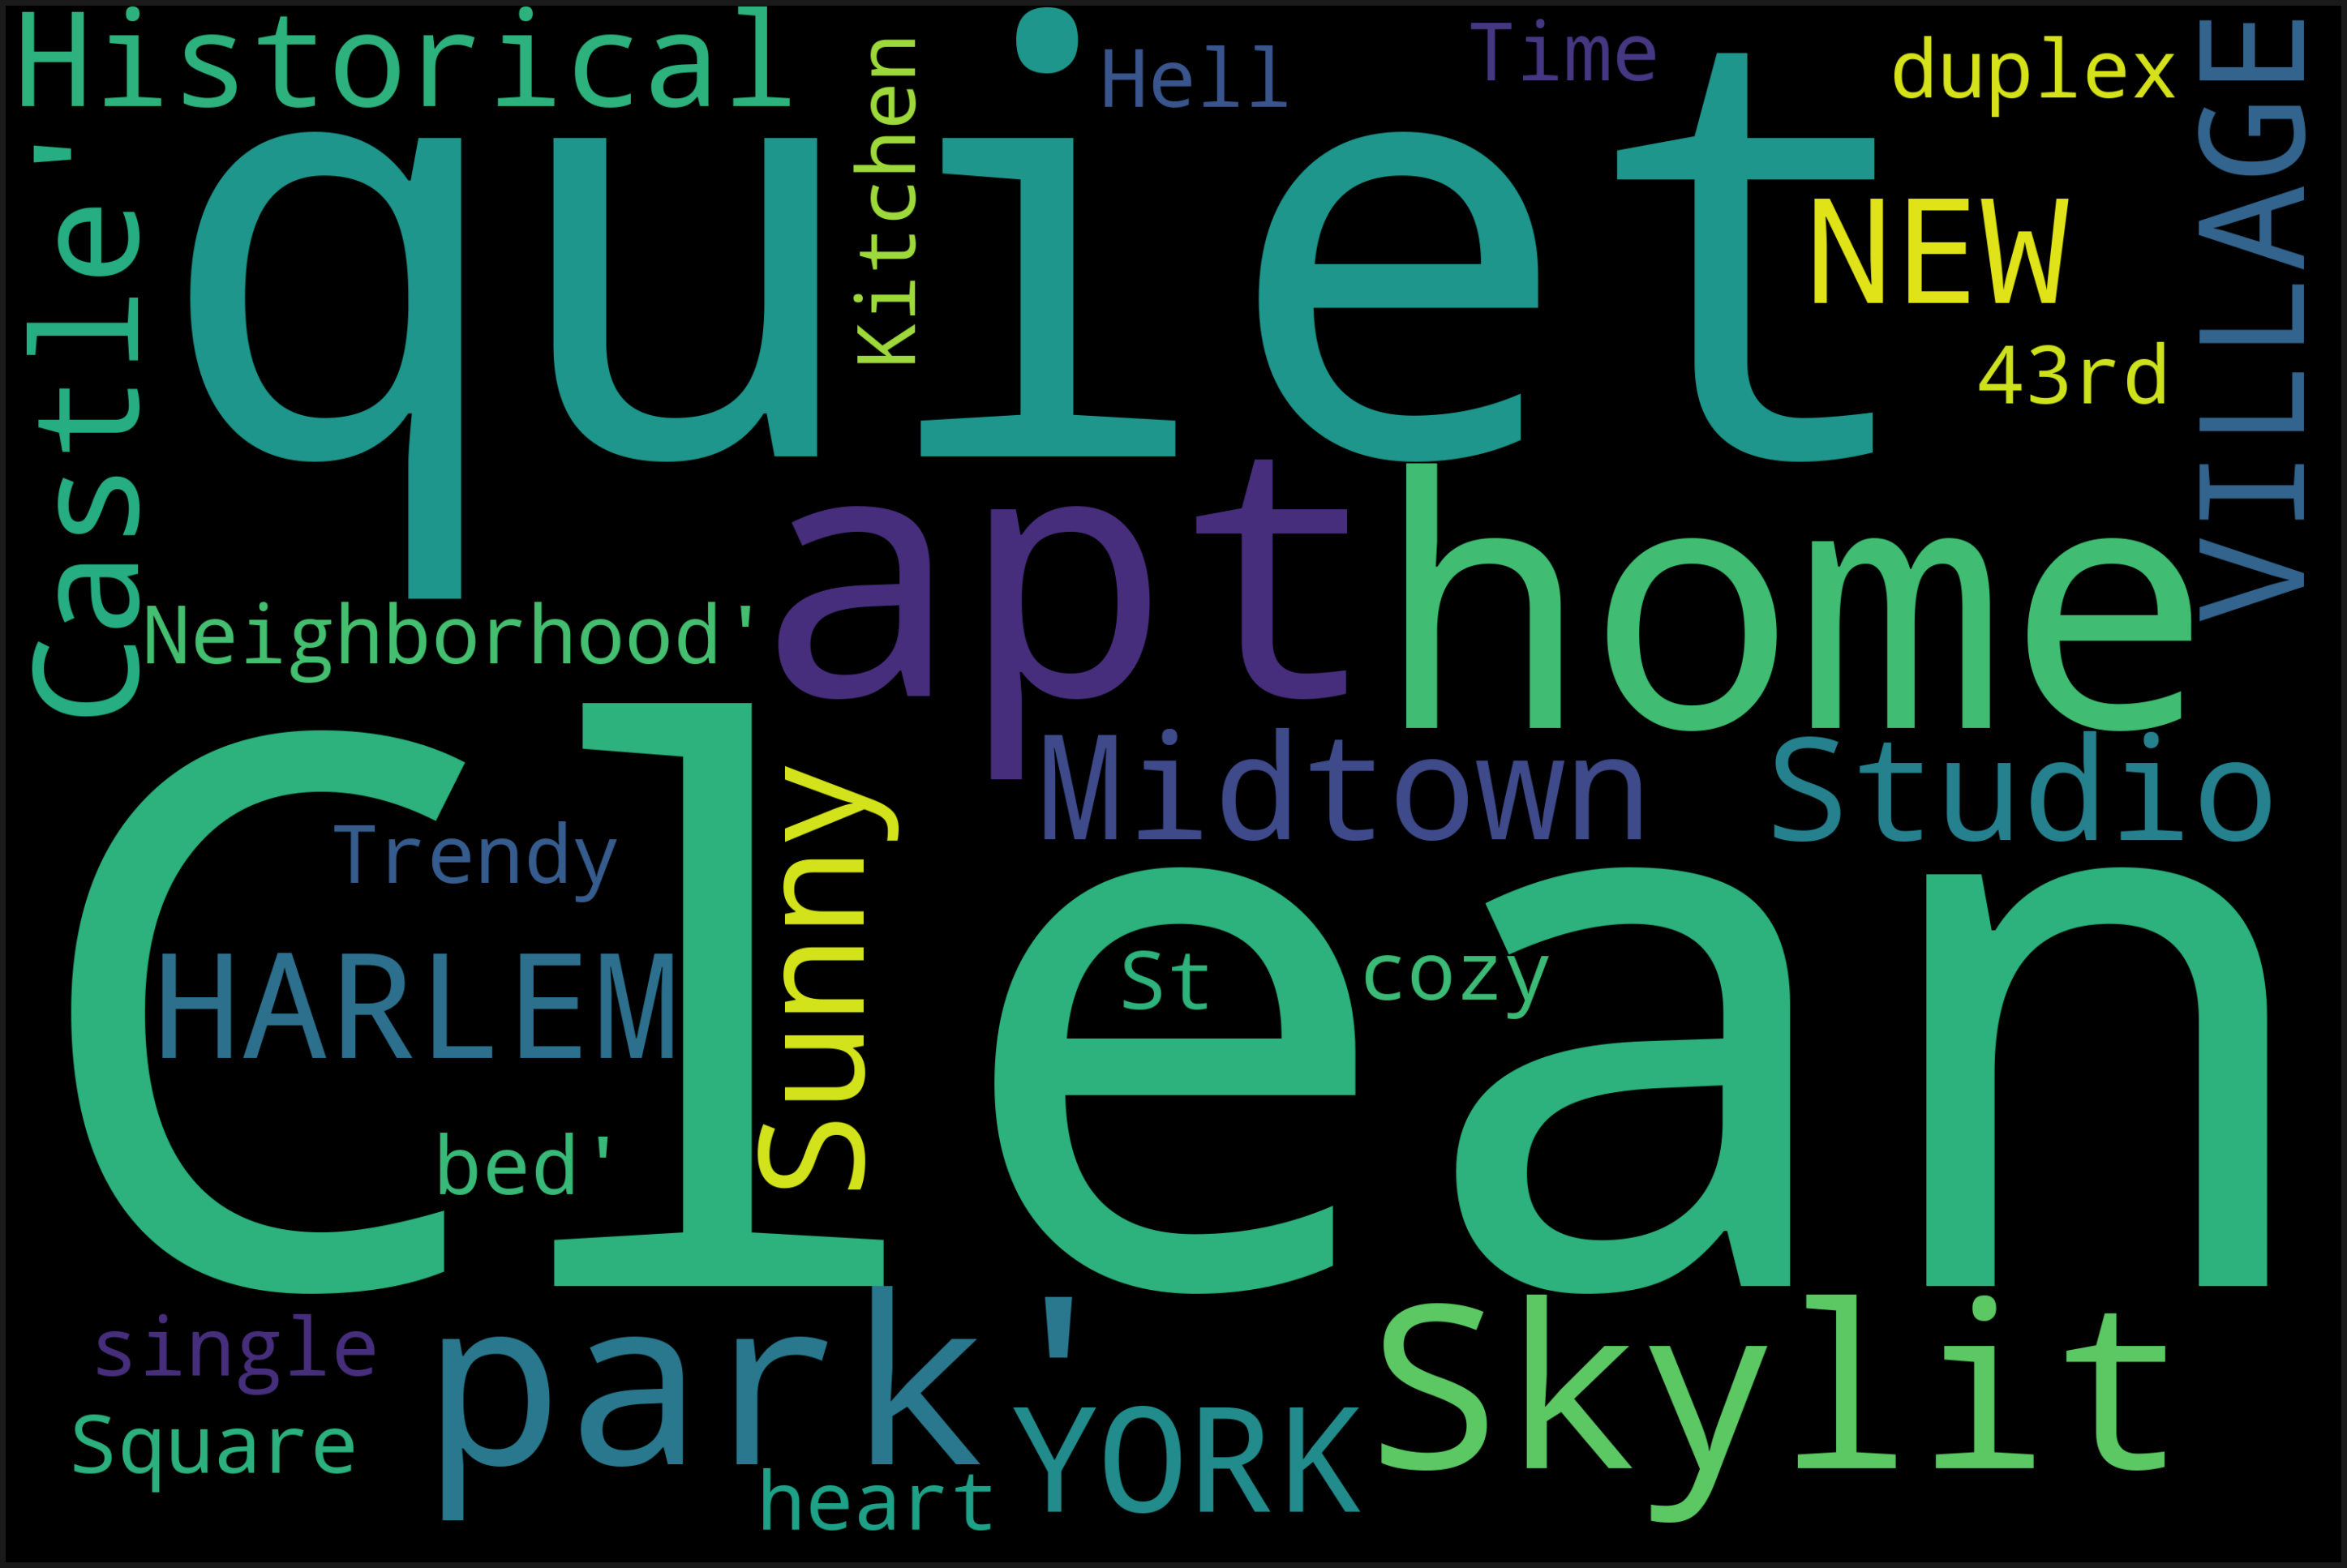

In [18]:
Descr_Text = airbnb_data.name.values #storing values of "name" column in a variable

#Creating wordcloud based on accommodation descriptions
Accomm_Descr_WC = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(Descr_Text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(Accomm_Descr_WC, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show(Accomm_Descr_WC)

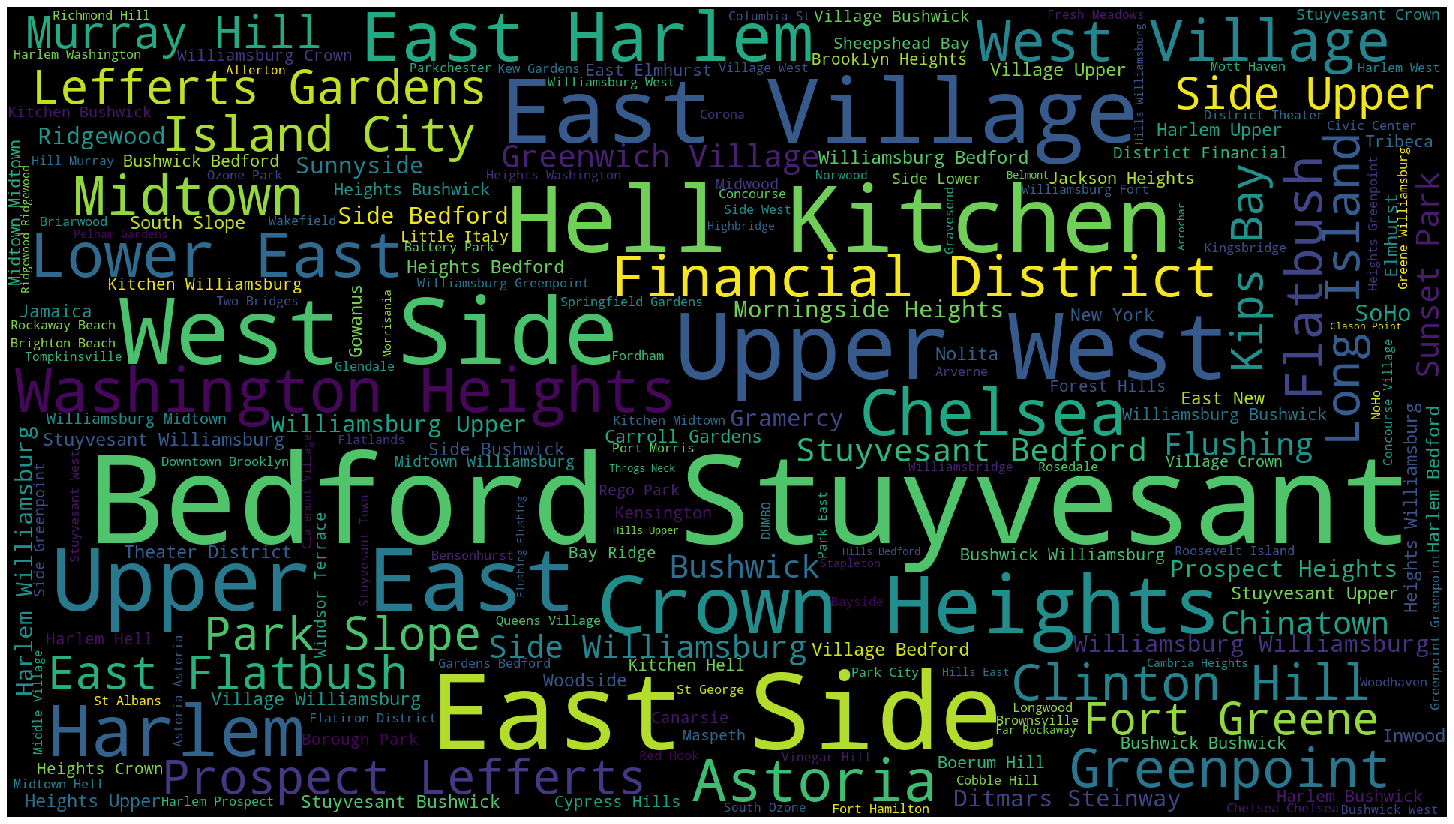

In [19]:
#creating a word cloud for neighbourhoods
plt.subplots(figsize=(20,15))
Neighbourhoods_WC = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb_data.neighbourhood))
plt.imshow(Neighbourhoods_WC)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show(Neighbourhoods_WC)

In [20]:
T5k_Hosts = airbnb_data["host_id"].value_counts().head(5000) #taking top 5000 hosts from dataframe
T5KH_Df = T5k_Hosts.to_frame() #turning it into a dataframe

T5KH_Df['host_id'] = T5KH_Df.index #as the host_id was stored as an index, the index was converted and given the name host_id
T5K = airbnb_data[airbnb_data["host_id"].isin(T5KH_Df["host_id"])] #taking top 5000 host_id rows from main dataset



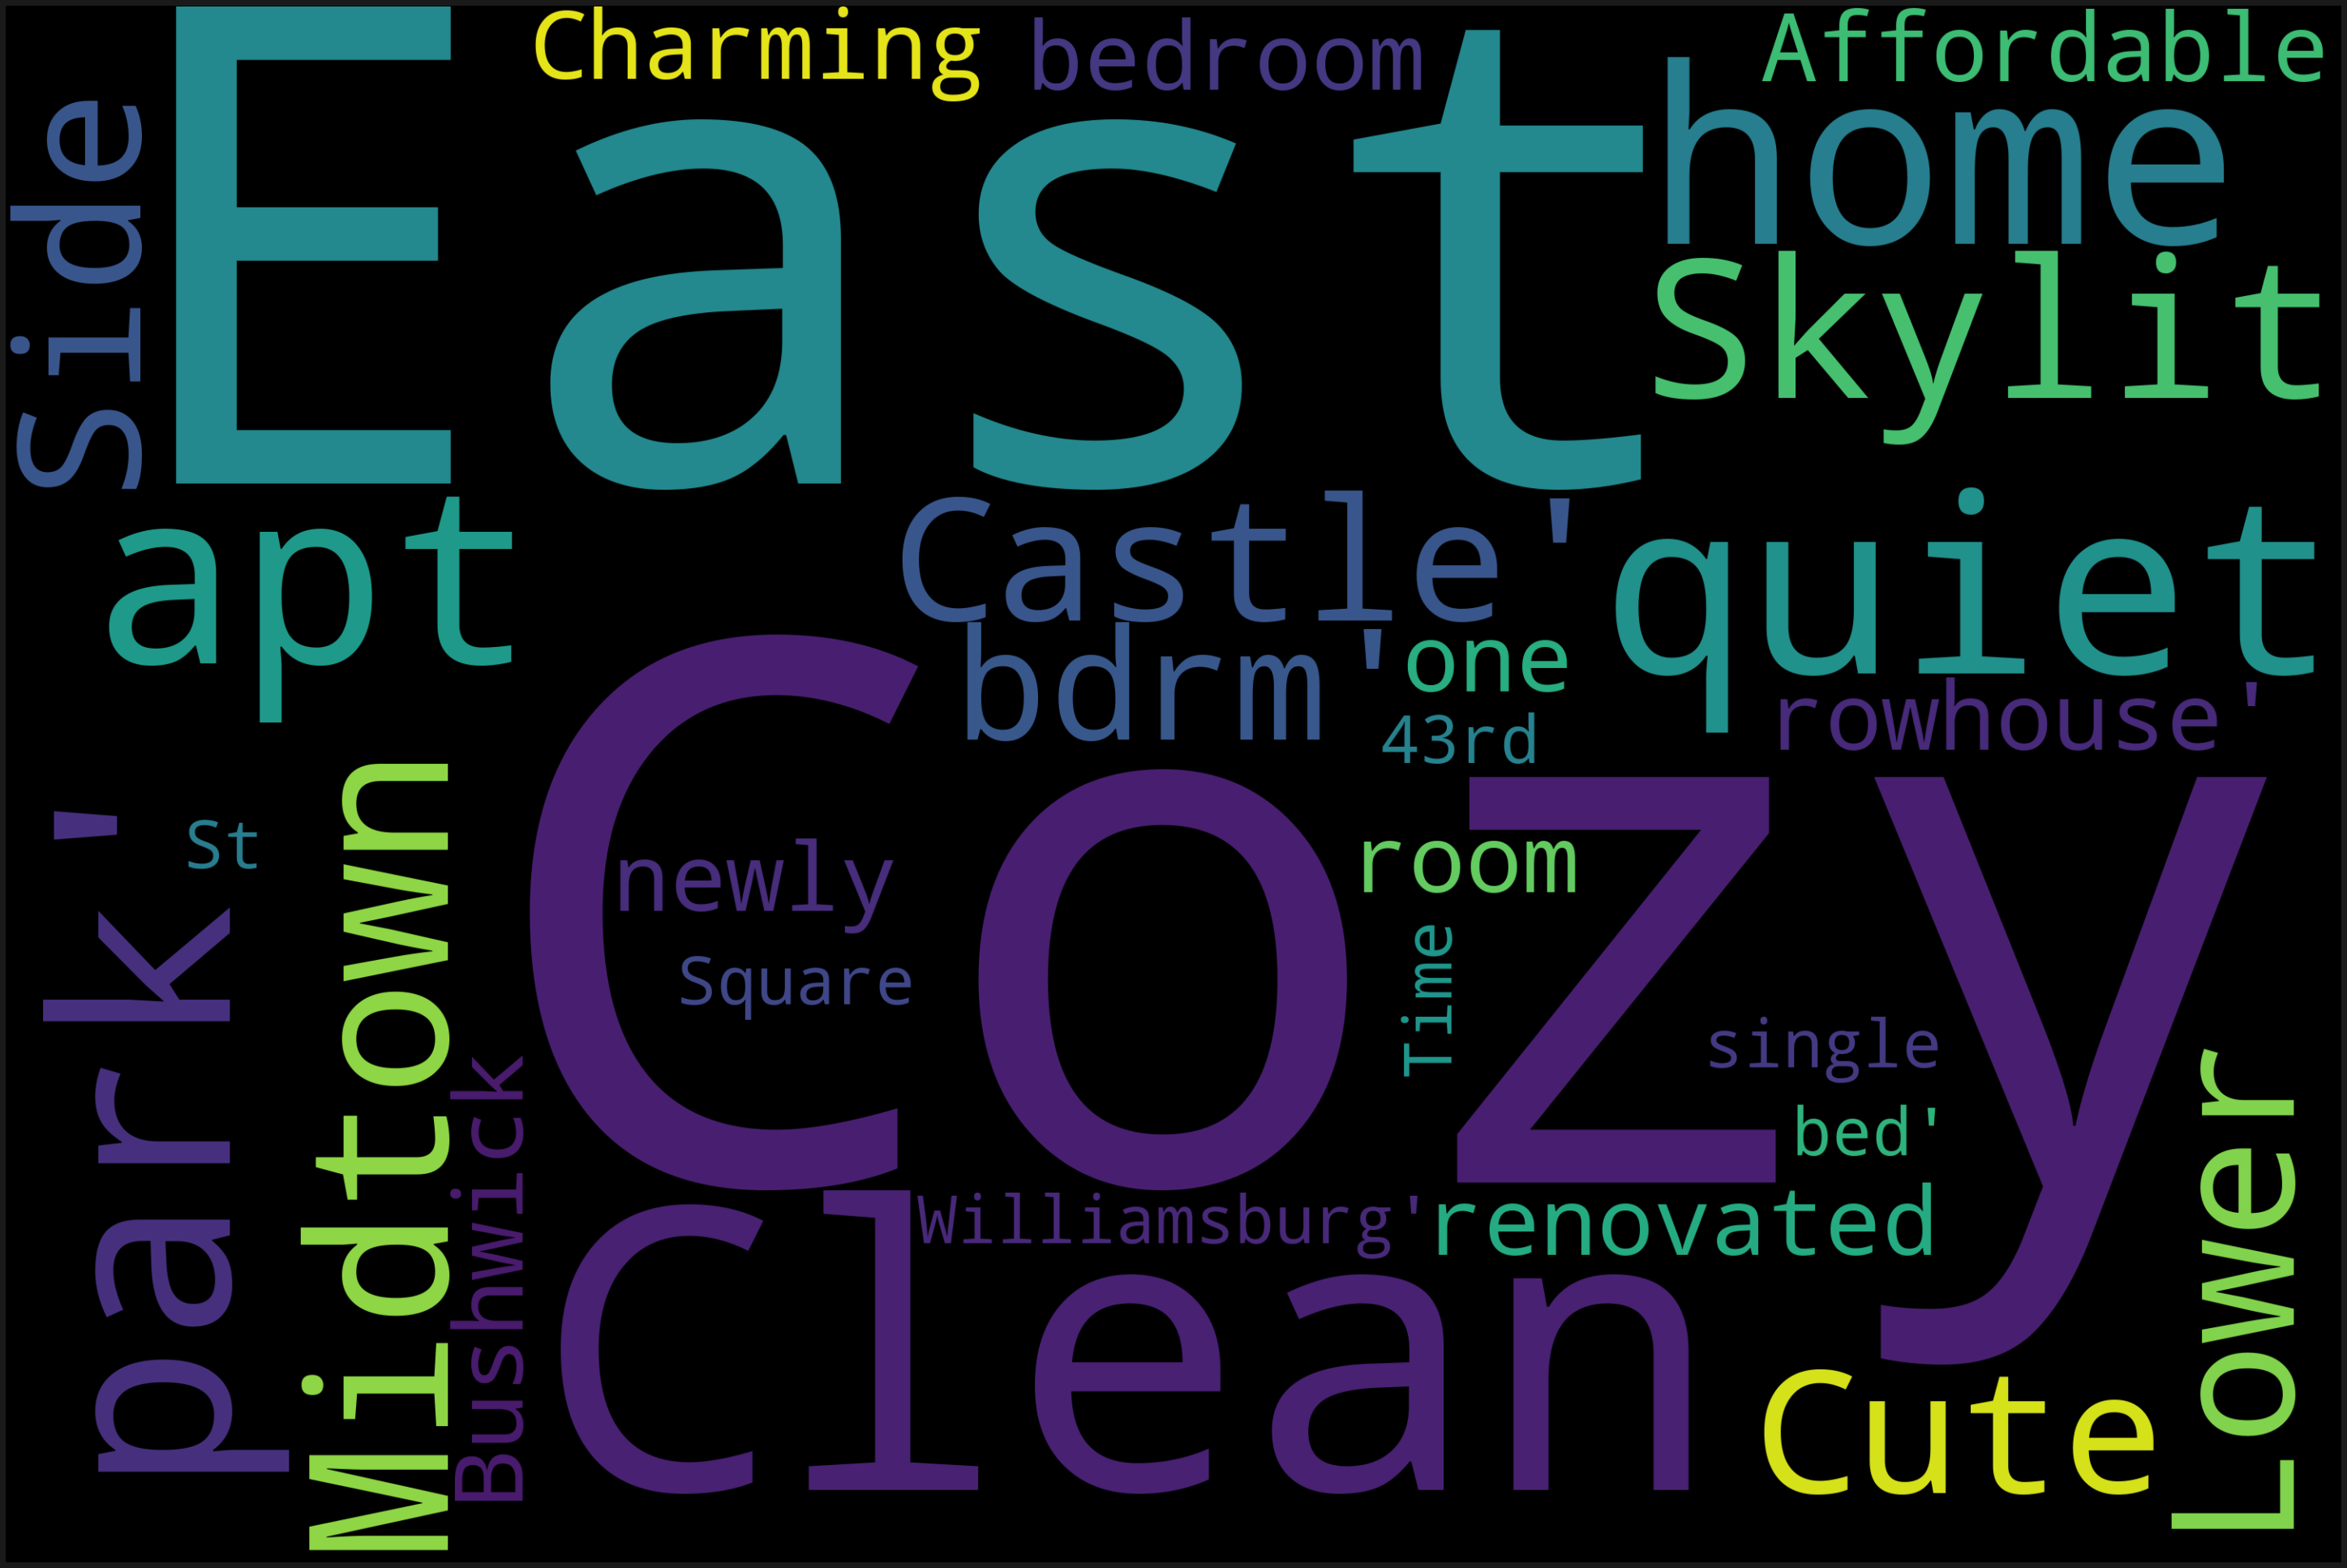

In [21]:
T5KH_Text = T5K.name.values #storing values of "name" column in a variable

#Creating wordcloud based on top 5000 hosts accommodation descriptions
T5K_WC = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(T5KH_Text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(T5K_WC, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show(T5K_WC)

In [22]:
B5k_Hosts = airbnb_data["host_id"].value_counts().tail(5000) #taking bottom 5000 hosts from dataframe
B5KH_Df = B5k_Hosts.to_frame() #turning it into a dataframe

B5KH_Df['host_id'] = B5KH_Df.index #as the host_id was stored as an index, the index was converted and given the name host_id

B5K = airbnb_data[airbnb_data["host_id"].isin(B5KH_Df["host_id"])] #taking bottom 5000 host_id rows from main dataset


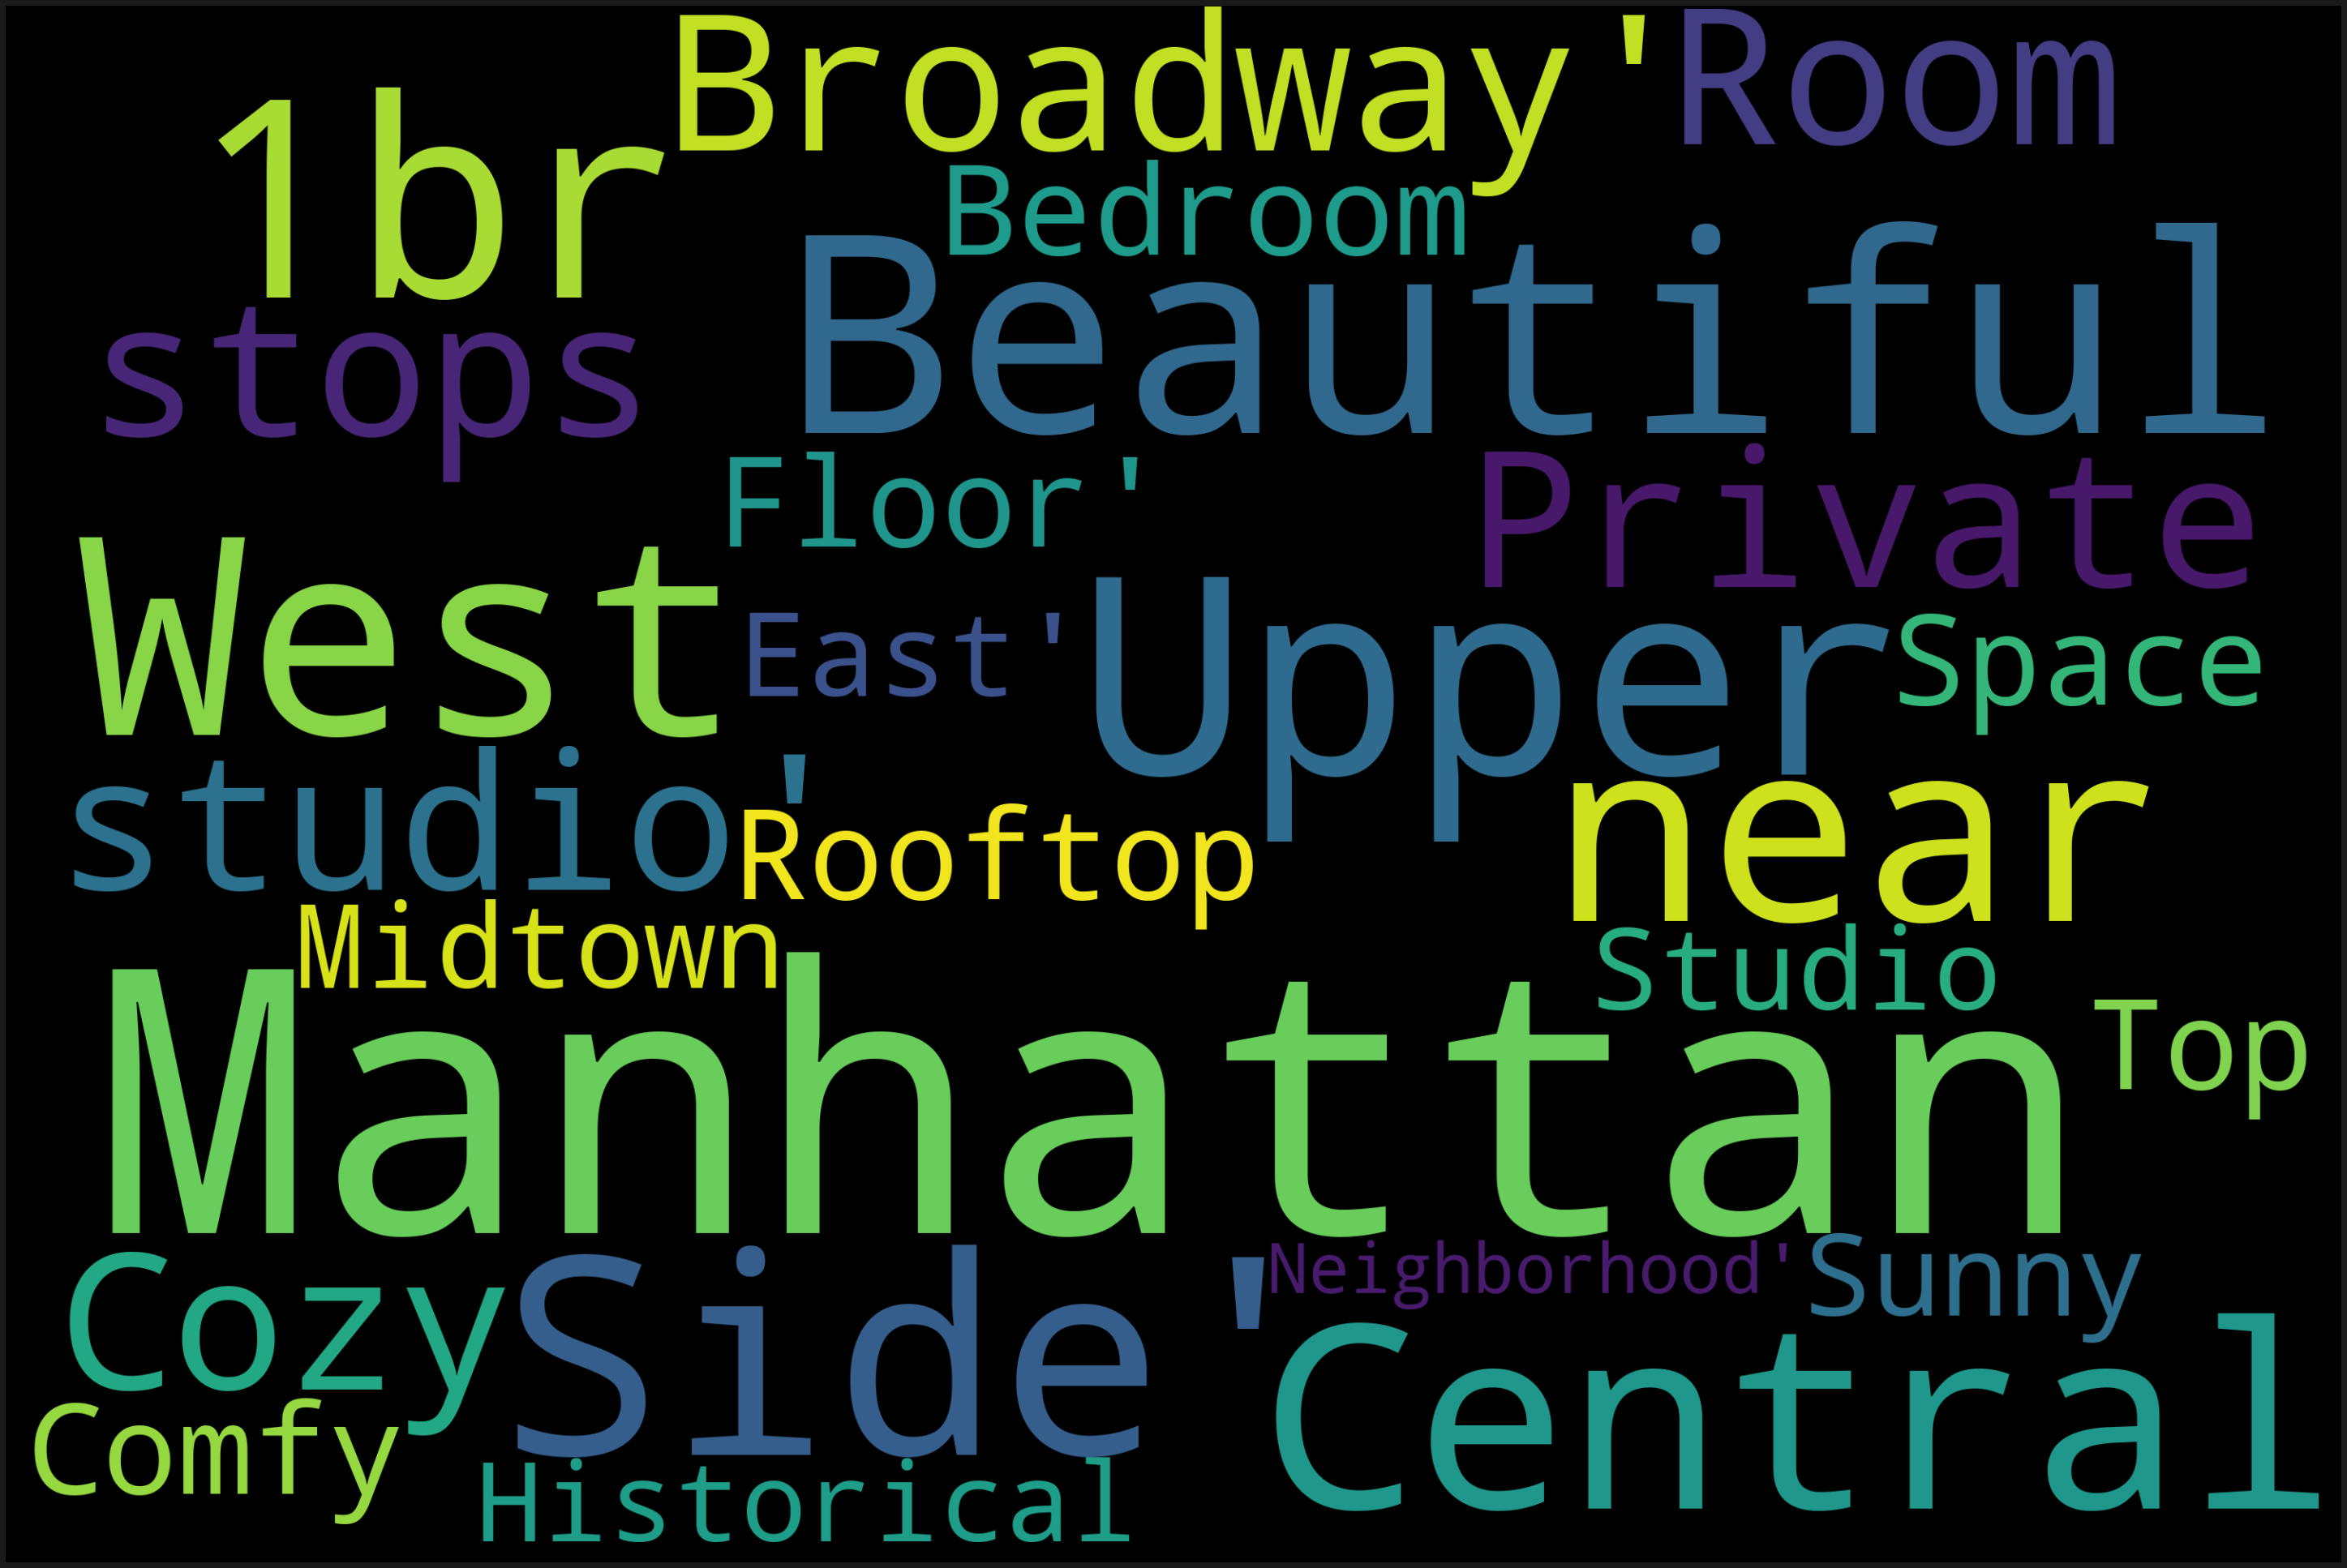

In [23]:
B5KH_Text = B5K.name.values #storing values of "name" column in a variable

#Creating wordcloud based on bottom 5000 hosts accommodation descriptions
B5K_WC = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(B5KH_Text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(B5K_WC, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show(B5K_WC)

In [25]:
#combining top and bottom 5000 hosts dataframes into one dataframe
TB_Dfs = [B5KH_Df,T5KH_Df] 
Combined_TB_Df = pd.concat(TB_Dfs)

#taking rows from the main dataset where host_id is not in the top or bottom 5000 hosts
Middle = airbnb_data[~airbnb_data["host_id"].isin(Combined_TB_Df["host_id"])]


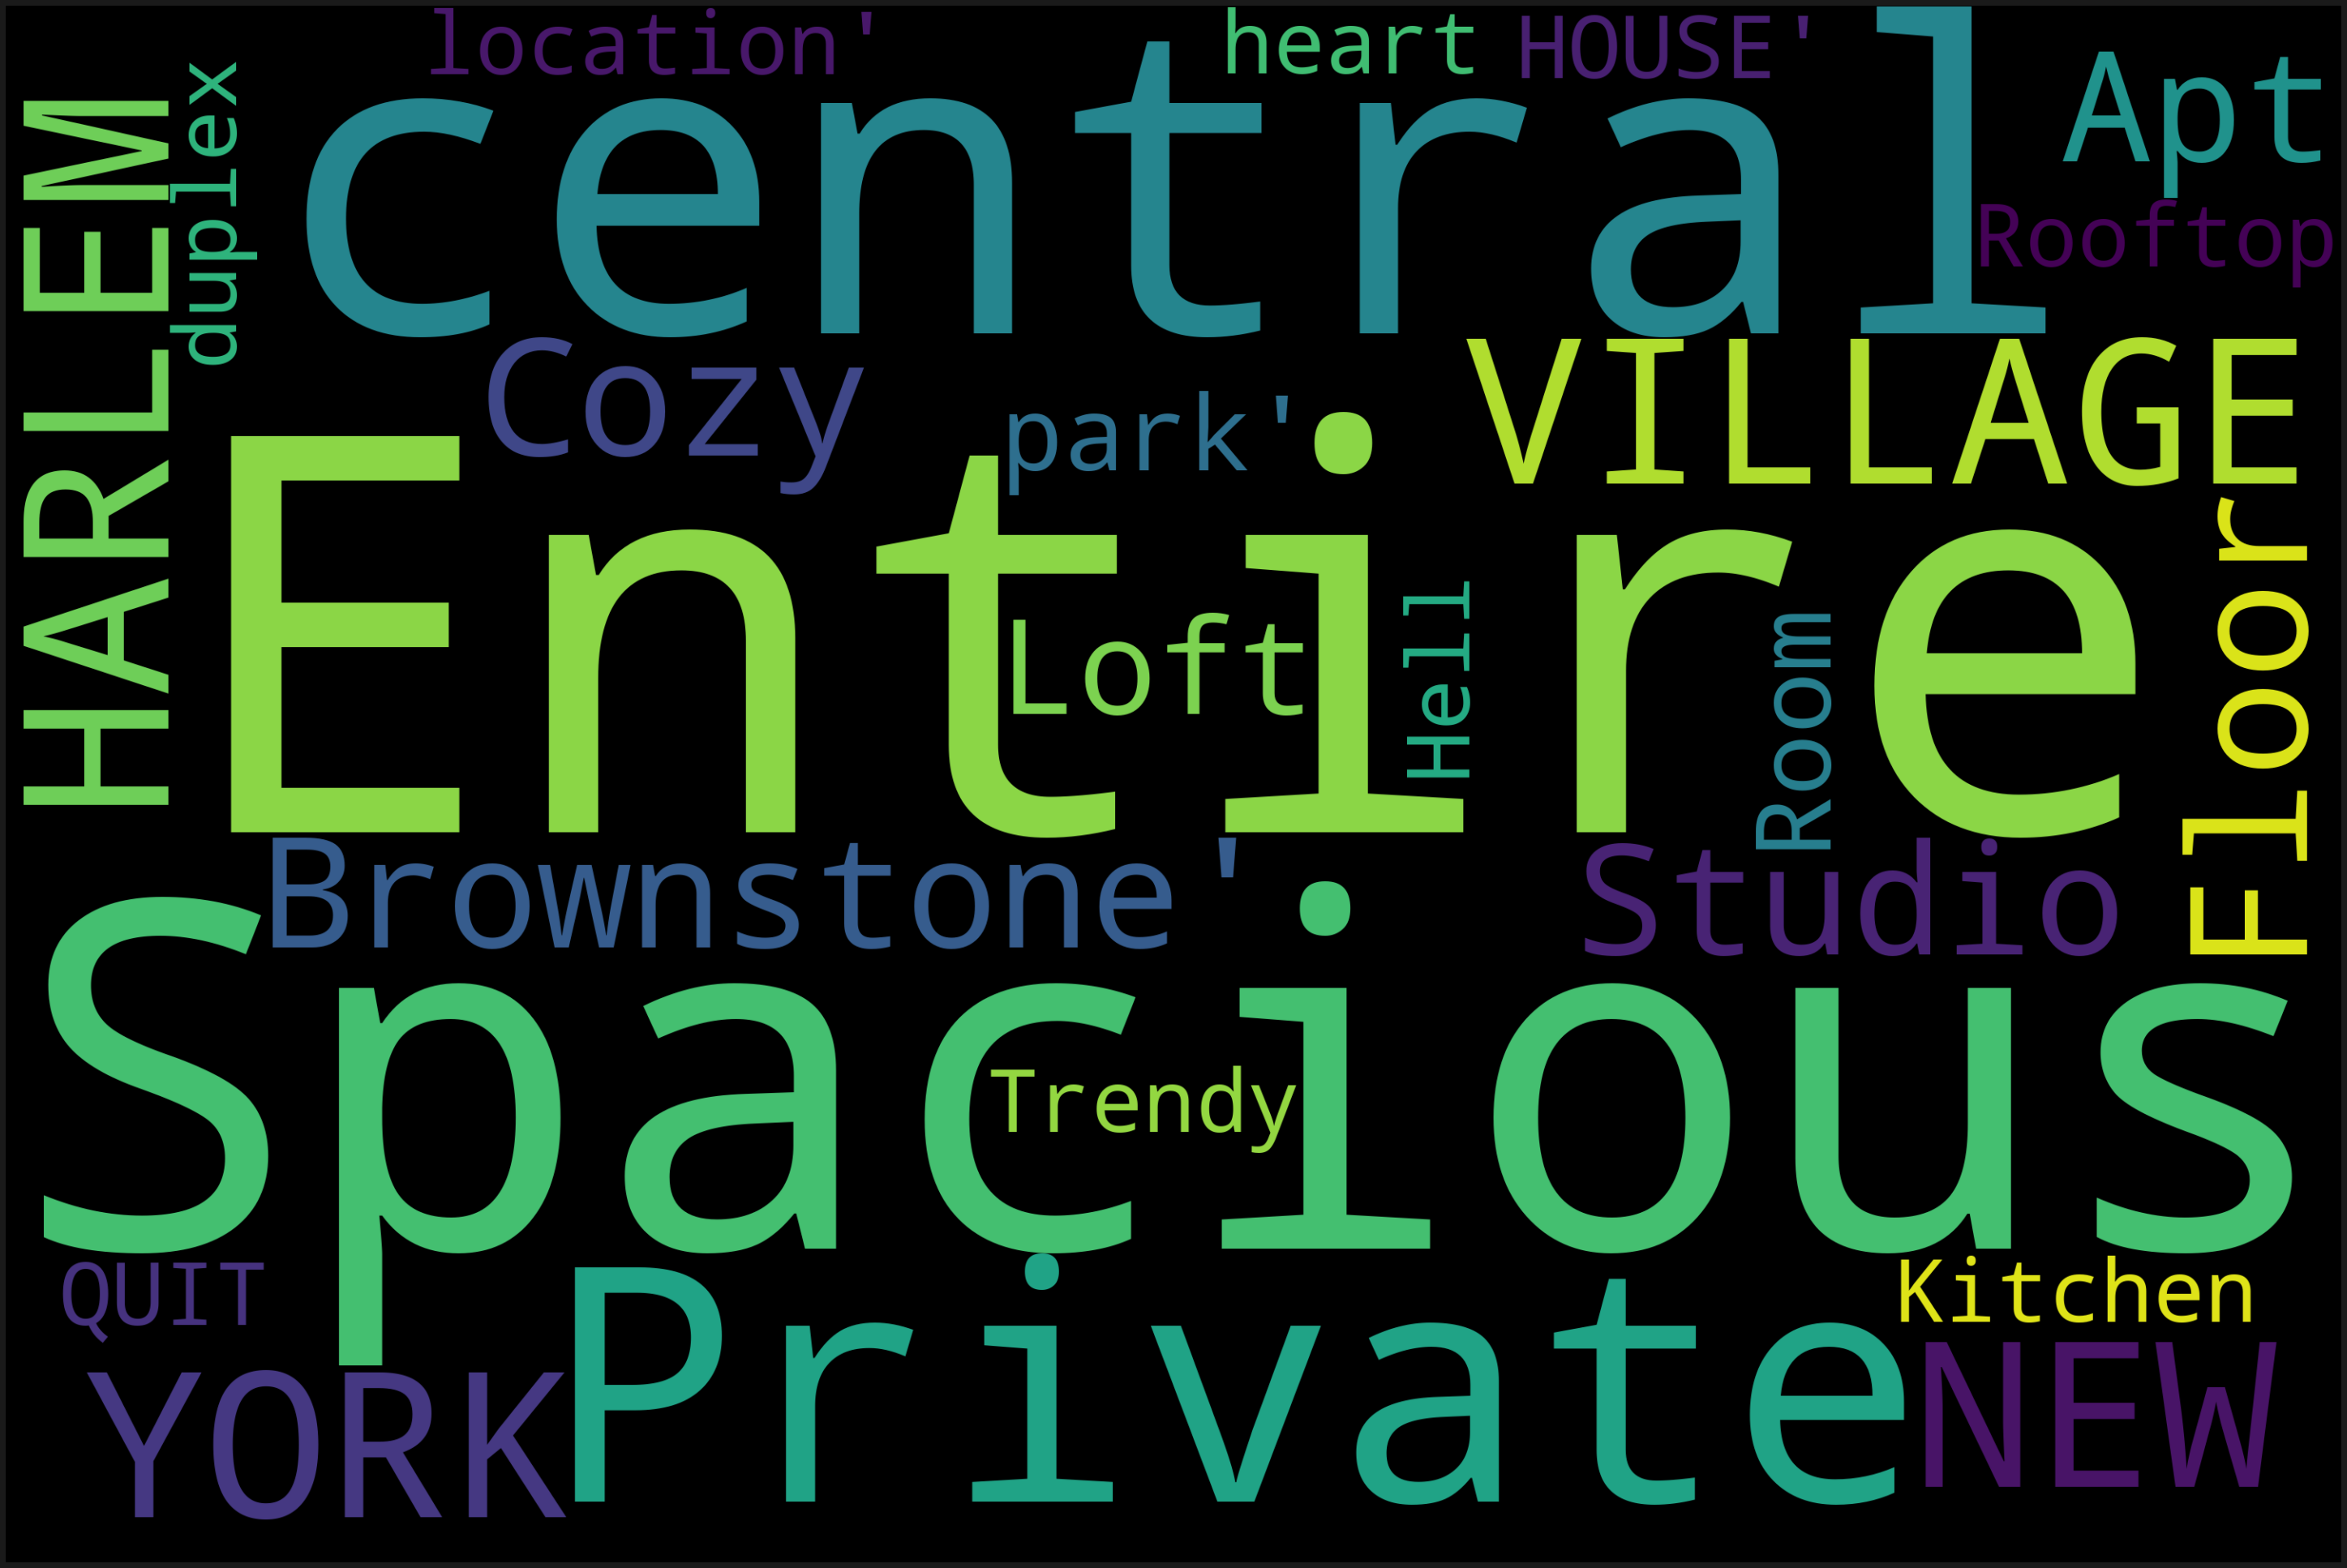

In [26]:
Middle_Text = Middle.name.values #storing values of "name" column in a variable

#Creating wordcloud based on hosts that are not in the top or bottom 5000
Middle_WC = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(Middle_Text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(Middle_WC , interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show(Middle_WC)

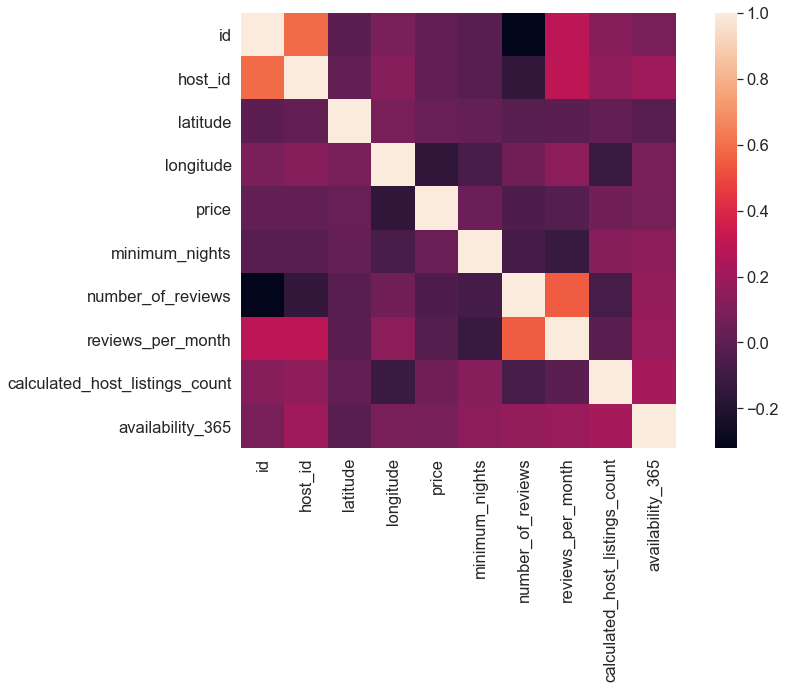

In [27]:
#correlation matrix 
Correlation_Matrix = airbnb_data.corr(method = "pearson")
sns.heatmap(Correlation_Matrix, vmax=1, square= True)

In [31]:
#getting average price for each neighbourhood group
Neighbourhood_Groups_Average_Price = airbnb_data.groupby(["neighbourhood_group"])["price"].mean().reset_index() #reset_index puts it back into a dataframe
print(Neighbourhood_Groups_Average_Price)

  neighbourhood_group       price
0               Bronx   87.496792
1            Brooklyn  124.383207
2           Manhattan  196.875814
3              Queens   99.517649
4       Staten Island  114.812332


In [32]:
#getting average price for each neighbourhood
Neighbourhood_Average_Price = airbnb_data.groupby(["neighbourhood"])["price"].mean().reset_index() #reset_index makes it back into a dataframe
N_AP_DESC = Neighbourhood_Average_Price.sort_values("price", ascending= False).head(10) #sorting values in descending order and getting top 10
                                                                                   # most expensive neighbourhoods
print(N_AP_DESC)

         neighbourhood       price
82      Fort Wadsworth  800.000000
219            Woodrow  700.000000
197            Tribeca  490.638418
174           Sea Gate  487.857143
167          Riverdale  442.090909
157       Prince's Bay  409.500000
6    Battery Park City  367.557143
75   Flatiron District  341.925000
161      Randall Manor  336.000000
144               NoHo  295.717949


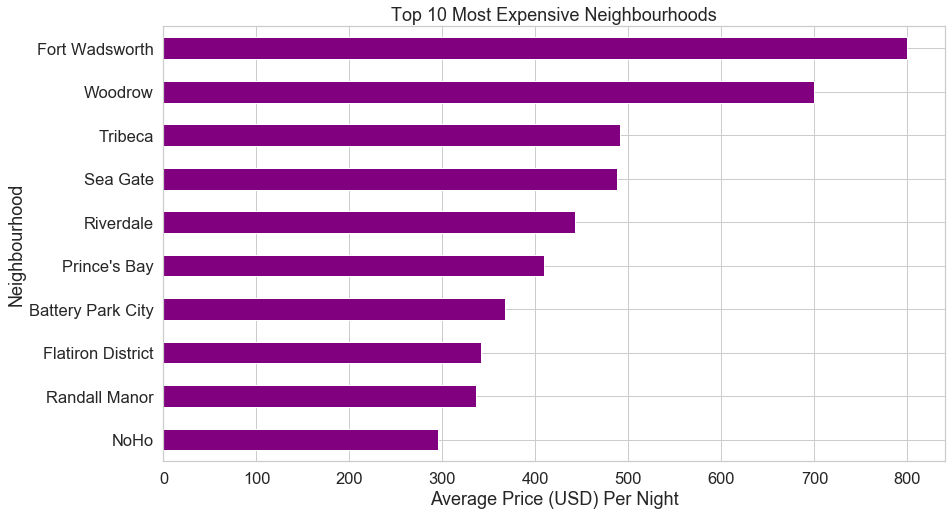

In [33]:
#horizonal bar chart of average price of top 10 most expensive neighbourhoods
N_AP_T10_Plot = N_AP_DESC.sort_values("price", ascending=True).plot.barh(x="neighbourhood", y="price", rot = 0, color = "purple")
N_AP_T10_Plot.set_title("Top 10 Most Expensive Neighbourhoods")
N_AP_T10_Plot.set_xlabel("Average Price (USD) Per Night")
N_AP_T10_Plot.set_ylabel("Neighbourhood")
N_AP_T10_Plot.get_legend().remove() #remove legened
plt.show(N_AP_T10_Plot)


In [34]:
#How much more expensive is Fort Wadsworth(most expensive) than Woodrow(second most expensive)
FWvW_PD = N_AP_DESC["price"].values[0]-N_AP_DESC["price"].values[1] #taking price of Fort Wadsworth from price of Woodrow
print("Fort Wadsworth and Woodrow Price Difference: $", FWvW_PD)

#how much is this as a percentage?
FWvW_PD_P = (FWvW_PD/N_AP_DESC["price"].values[1]) * 100 #getting percentage difference between the 2 prices
#FWvW_PD_Percent =  #rounding to 2 decimal places
print("Percentage Increase:", (round(FWvW_PD_P,2)), "%") #rounding to 2 decimal places

Fort Wadsworth and Woodrow Price Difference: $ 100.0
Percentage Increase: 14.29 %


In [35]:
#getting average price for each neighbourhood
Neighbourhood_Average_Price = airbnb_data.groupby(["neighbourhood"])["price"].mean().reset_index() #reset_index makes it back into a dataframe
N_AP_ASC = Neighbourhood_Average_Price.sort_values("price", ascending= True).head(10) #sorting values in ascending order and getting top 10
                                                                                   # most expensive neighbourhoods
print(N_AP_ASC)

      neighbourhood      price
27      Bull's Head  47.333333
102     Hunts Point  50.500000
196         Tremont  51.545455
179       Soundview  53.466667
141        New Dorp  57.000000
24        Bronxdale  57.105263
142  New Dorp Beach  57.400000
88       Grant City  57.666667
46          Concord  58.192308
135      Mount Eden  58.500000


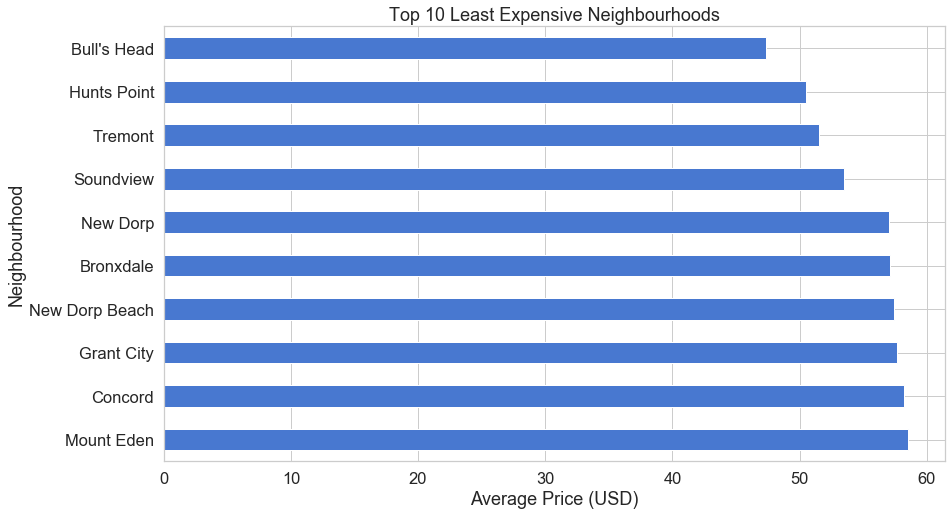

In [36]:
#horizonal bar chart of average price of top 10 least expensive neighbourhoods
N_AP_B10_Plot = N_AP_ASC.sort_values("price", ascending=False).plot.barh(x="neighbourhood", y="price", rot = 0)
N_AP_B10_Plot.set_title("Top 10 Least Expensive Neighbourhoods")
N_AP_B10_Plot.set_xlabel("Average Price (USD)")
N_AP_B10_Plot.set_ylabel("Neighbourhood")
N_AP_B10_Plot.get_legend().remove() #remove legened
plt.show(N_AP_B10_Plot)

In [37]:
#how much cheaper is Bull's Head(cheapest) than Hunts Point(second cheapest)
BHvHP_PD = N_AP_ASC["price"].values[0] - N_AP_ASC["price"].values[1]
print("How much cheaper is Bulls Head than Hunts Point?")
print("Bull's Head is", "$", (round(BHvHP_PD,2)), "cheaper than Hunts Point")
print("")

#How much of a percentage difference is this?
BHvHP_PD_P =(BHvHP_PD/N_AP_ASC["price"].values[1]) *100
BHvHP_PD_Percent = (round(BHvHP_PD_P,2)) #rounding to 2 decimal places
print("Percentage Decrease:", BHvHP_PD_Percent,"%")

How much cheaper is Bulls Head than Hunts Point?
Bull's Head is $ -3.17 cheaper than Hunts Point

Percentage Decrease: -6.27 %


# Machine Learning Models

This section includes models for predicting Airbnb prices.

Text(0.5, 1.0, 'Log Price Distribution Plot')

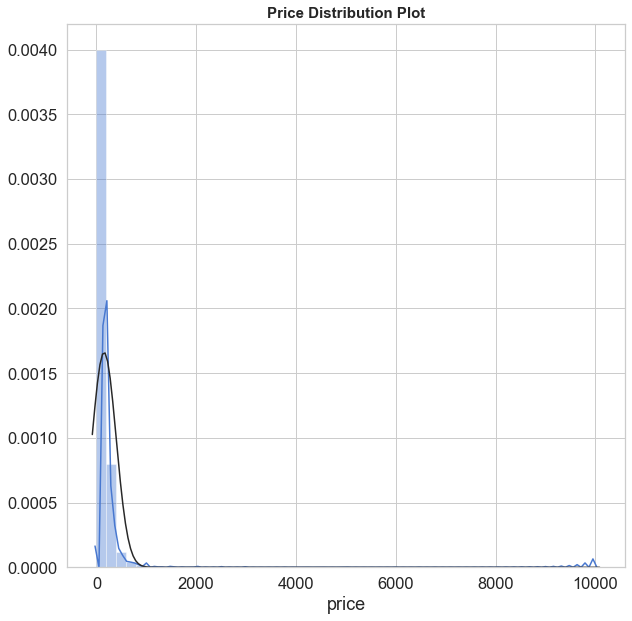

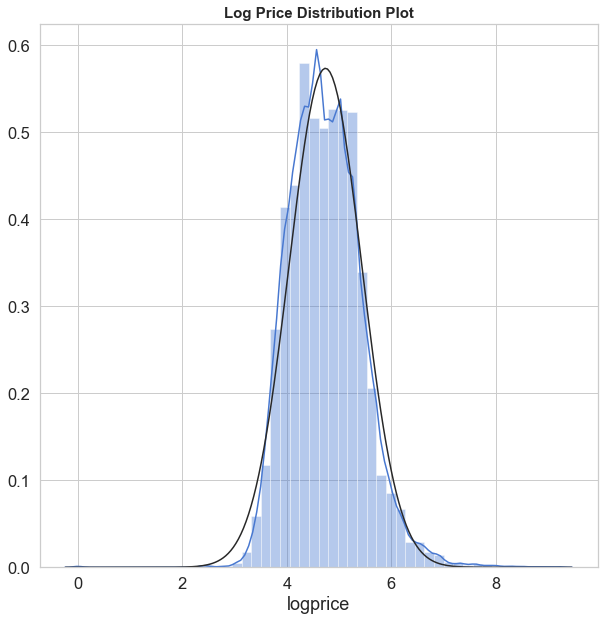

In [38]:
#Normal price distribution plot
plt.figure(figsize=(10,10))
sns.distplot(airbnb_data['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

#changing the price to log of actual price +1 to make the distribution normal
airbnb_data['logprice'] = np.log(airbnb_data.price+1)

#logarithm price distribution plot
plt.figure(figsize=(10,10))
sns.distplot(airbnb_data['logprice'], fit=norm)
plt.title("Log Price Distribution Plot",size=15, weight='bold')

[(11, 0)]

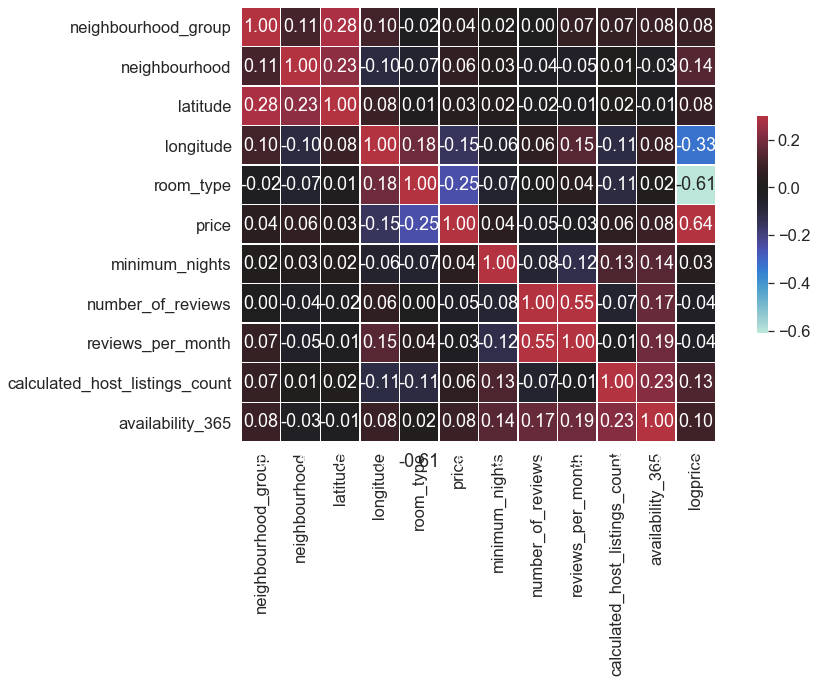

In [39]:
#Dropping the columns not required for machine learning as they are in string format or not that important 
bnb_model = airbnb_data.drop(columns=['name','id' ,'host_id','host_name',
                                   'last_review'])

# Converting the essential columns in strings to categories giving them dummy integers
bnb_model['neighbourhood_group']= bnb_model['neighbourhood_group'].astype("category").cat.codes
bnb_model['neighbourhood'] = bnb_model['neighbourhood'].astype("category").cat.codes
bnb_model['room_type'] = bnb_model['room_type'].astype("category").cat.codes

#Corelation matrix plot of essential columns 
corrmat= bnb_model.corr(method='pearson')
fig, ax = plt.subplots(1,1, figsize=(15,8))
sns.heatmap(corrmat, annot=True, fmt=".2f", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))

In [40]:
#Checking number of null values in each column 
bnb_model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
logprice                              0
dtype: int64

In [41]:
#Replacing the mean value in place of null values
mean = bnb_model['reviews_per_month'].mean()
bnb_model['reviews_per_month'].fillna(mean, inplace=True)
bnb_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
logprice                          0
dtype: int64

# Linear Regression Model

In [42]:
#Putting the cleaned data in a new variable
bnb_model_x = bnb_model

#Putting the price values in y
y = bnb_model_x['logprice'].values

#Dropping the price and logarithmic price column in the model 
bnb_model_x= bnb_model_x.drop(['logprice'],axis=1)
bnb_model_x= bnb_model_x.drop(['price'],axis=1)

#Taking the values of all the input data in X
X = bnb_model_x.values

#Dividing the whole dataset randomly into train and test in a ratio 80:20
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=2)

In [55]:
#Creating the Linear Regresssion model
lin_model =LinearRegression(fit_intercept = True, normalize = True)

#Training the data in Linear Regression model
lin_reg = lin_model.fit(Xtrain, ytrain)

#Predicting the saved test data
lin_predictions = lin_reg.predict(Xtest)

#Comparing the test data with the predicted data and fetching the error values to compare with other model
print('RMSE: %f'% np.sqrt(mean_squared_error(ytest, lin_predictions))) 
print('MSE: %f'% mean_squared_error(ytest, lin_predictions))   

RMSE: 0.514513
MSE: 0.264724


# Ridge Model

In [52]:
#Creating the Ridge model
ridge_model = Ridge(alpha = 0.01, normalize = True)

#Training the data in Ridge model
ridge_reg = ridge_model.fit(Xtrain, ytrain)

#Predicting the saved test data
ridge_predictions = ridge_reg.predict(Xtest) 

#Comparing the test data with the predicted data and fetching the error values to compare with other model 
print('RMSE: %f'% np.sqrt(mean_squared_error(ytest, ridge_predictions)))  
print('MSE: %f'% mean_squared_error(ytest, ridge_predictions))  

RMSE: 0.514576
MSE: 0.264789


# Elasticnet Model

In [53]:
#Creating the Elastic Net model
elasticnet_model = ElasticNet(alpha = 0.01, normalize = True)

#Training the data in Elastic Net model
elasticnet_reg = elasticnet_model.fit(Xtrain, ytrain)

#Predicting the saved test data
elasticnet_predictions = elasticnet_reg.predict(Xtest) 

#Comparing the test data with the predicted data and fetching the error values to compare with other model
print('RMSE: %f'% np.sqrt(mean_squared_error(ytest, elasticnet_predictions)))   
print('MSE: %f'% mean_squared_error(ytest, elasticnet_predictions))  

RMSE: 0.698965
MSE: 0.488552


# Lasso Model

In [54]:
#Creating the Lasso model
lasso_model =Lasso(alpha = 0.01, normalize = True)

#Training the data in Lasso model
lasso_reg = lasso_model.fit(Xtrain, ytrain)

#Predicting the saved test data
lasso_predictions = lasso_reg.predict(Xtest)

#Comparing the test data with the predicted data and fetching the error values to compare with other model
print('RMSE: %f'% np.sqrt(mean_squared_error(ytest, lasso_predictions)))
print('MSE: %f'% mean_squared_error(ytest, lasso_predictions))   

RMSE: 0.698965
MSE: 0.488552


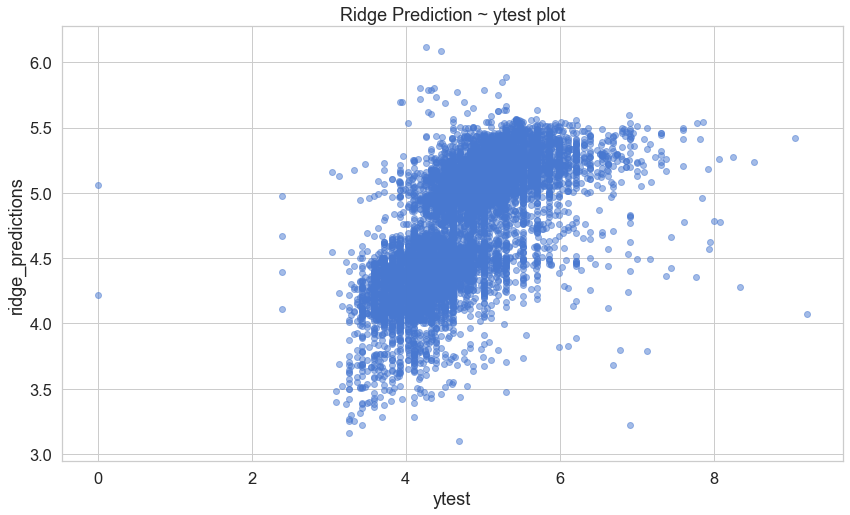

In [47]:
#Plot between the ridge predicted data and test data
plt.scatter(ytest, ridge_predictions, alpha=0.5)
plt.title('Ridge Prediction ~ ytest plot')
plt.xlabel('ytest')
plt.ylabel('ridge_predictions')
plt.show()

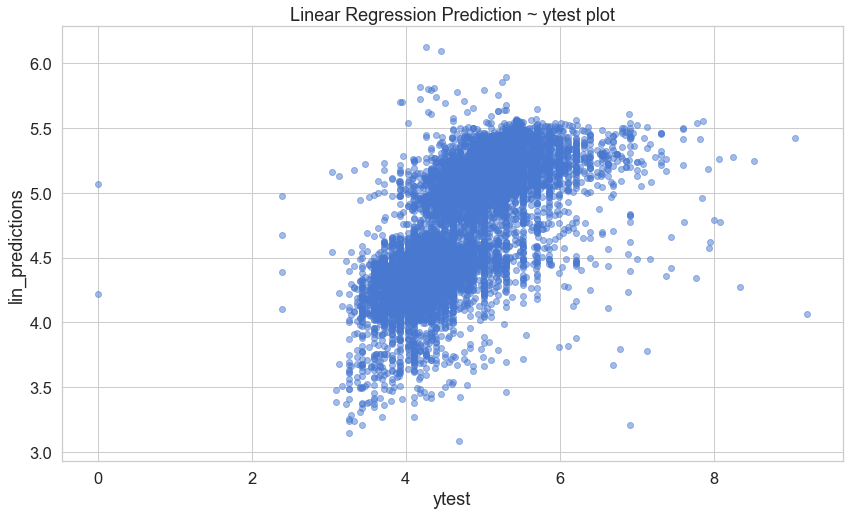

In [48]:
#Plot between the linear regression predicted data and test data
plt.scatter(ytest, lin_predictions, alpha=0.5)
plt.title('Linear Regression Prediction ~ ytest plot')
plt.xlabel('ytest')
plt.ylabel('lin_predictions')
plt.show()